In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_boston

In [2]:
boston=load_boston()
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df

C:\Users\posco\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df['Price']=boston.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


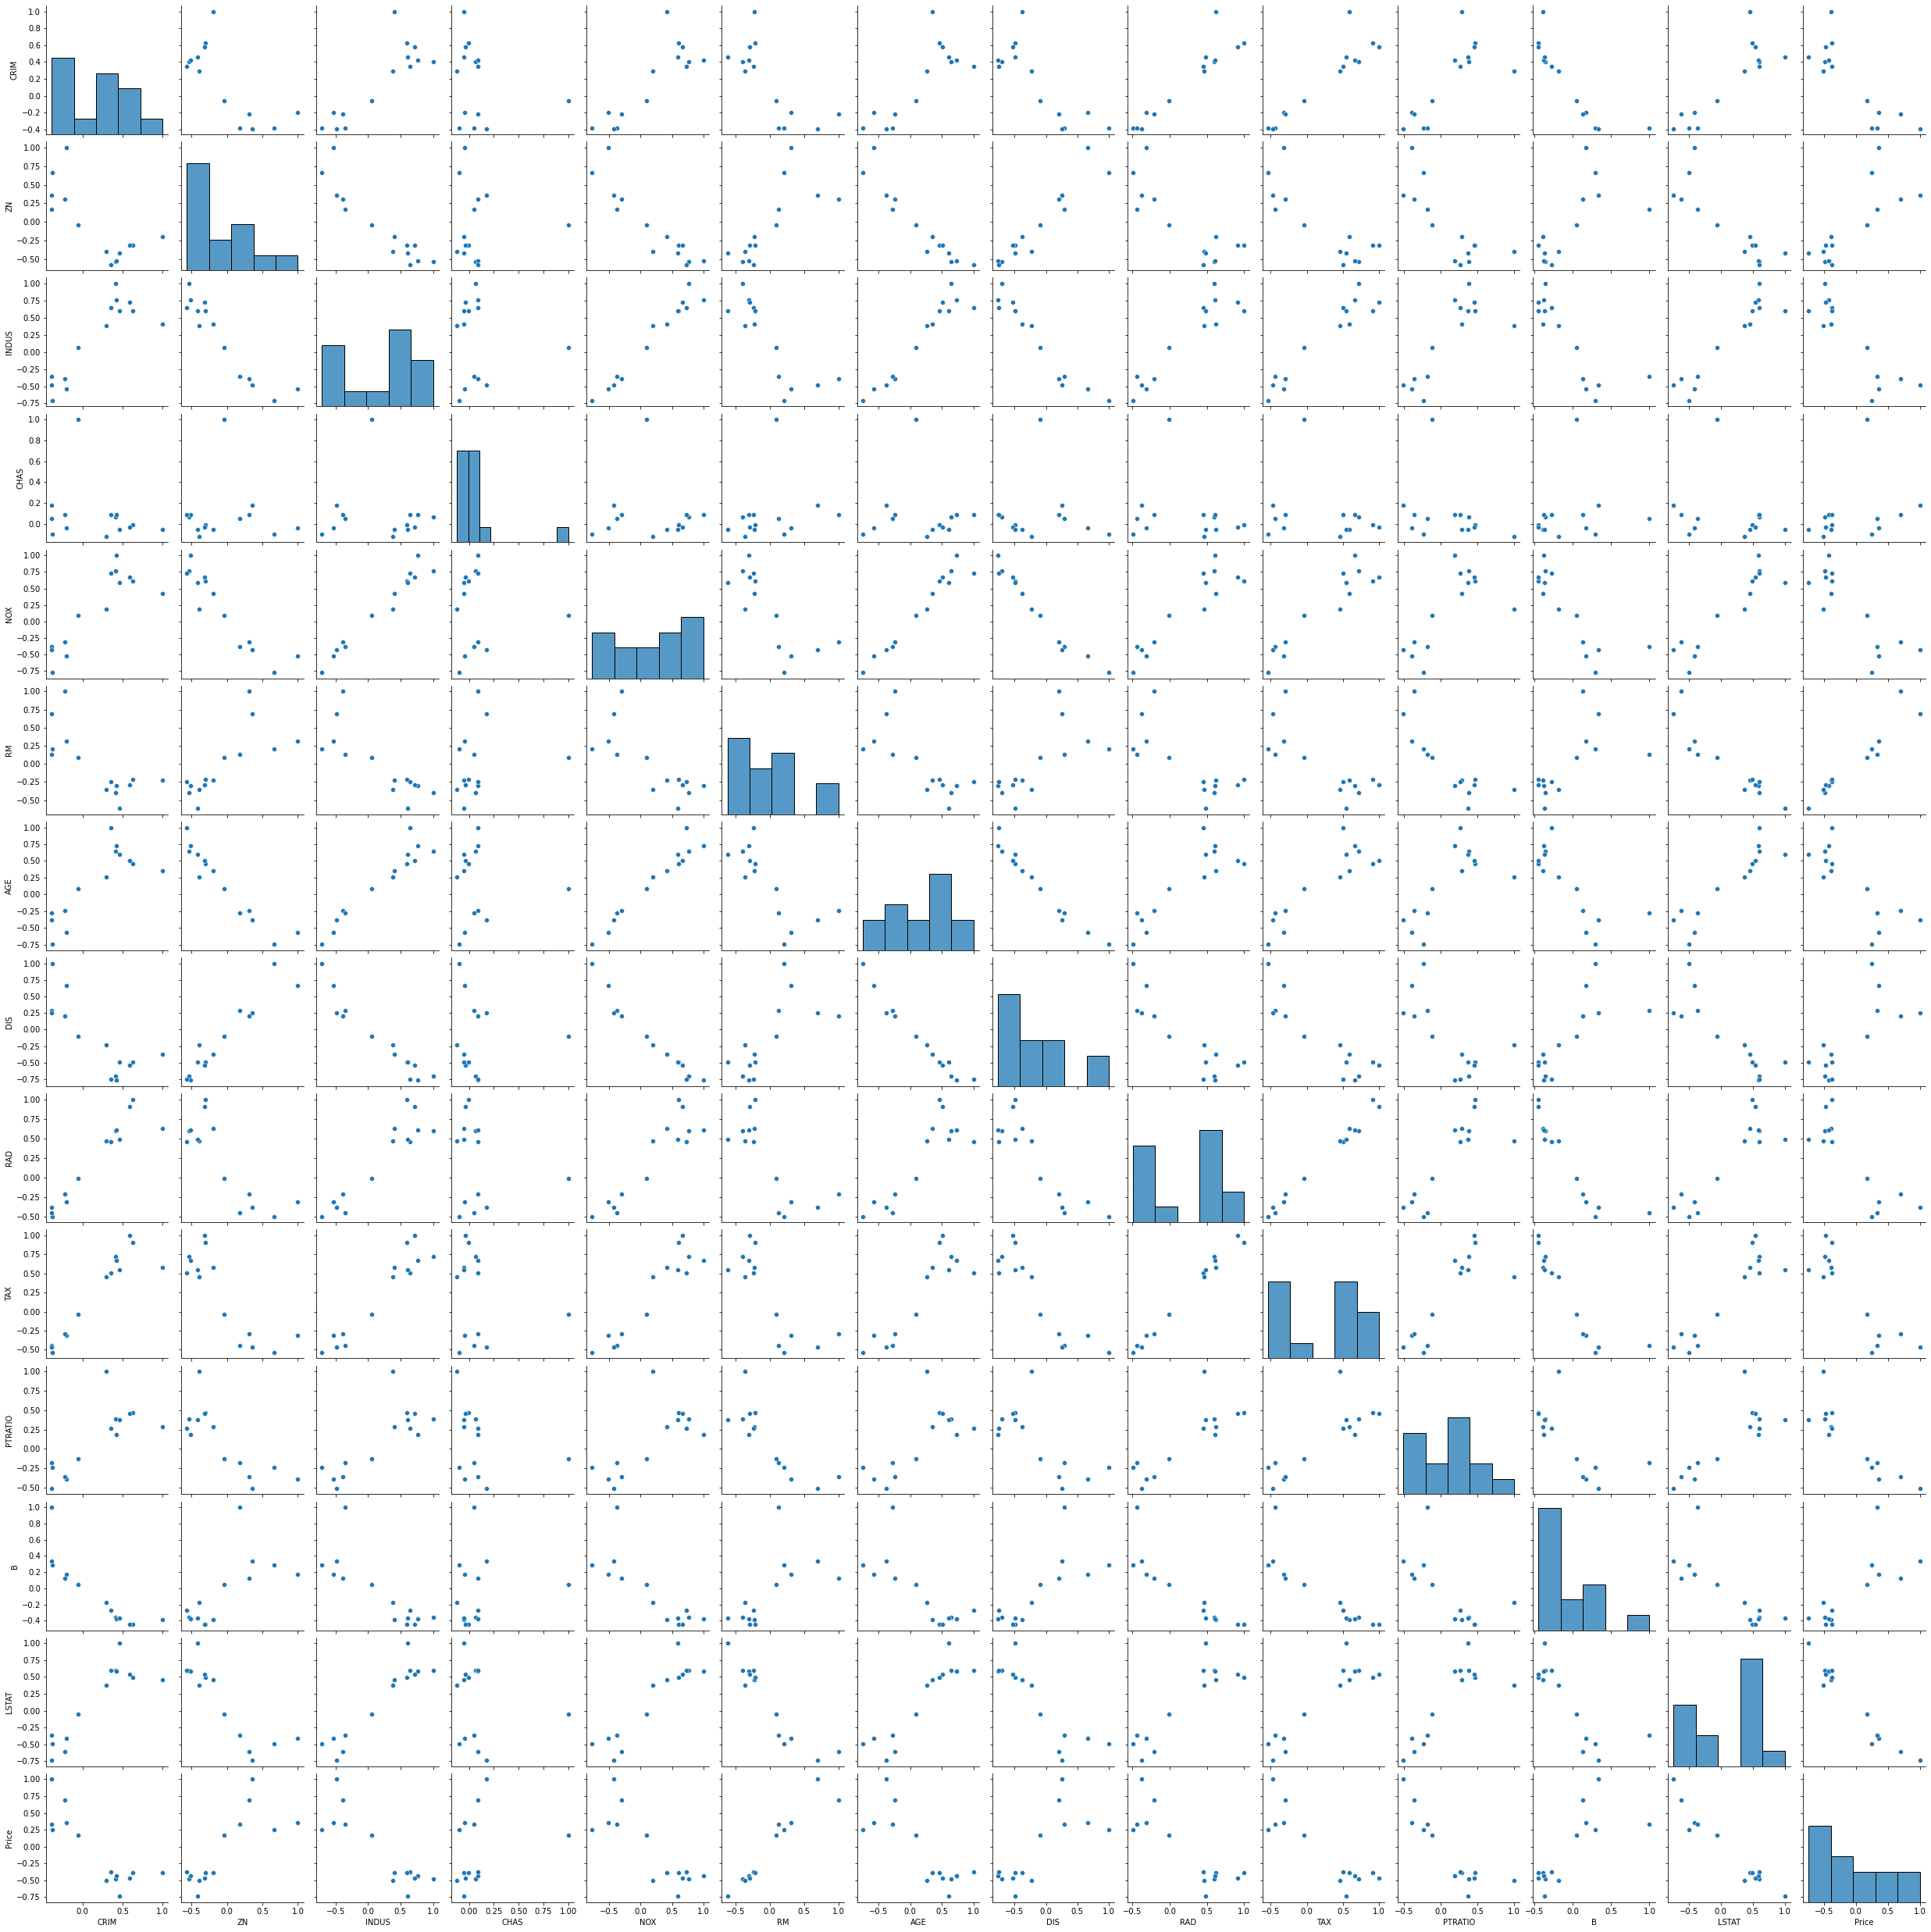

In [5]:
sns.pairplot(df.corr())

In [6]:
x=df.drop('Price',axis=1)
y=df['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
algo_list=[LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor]

for algo in algo_list:
    algo=algo()
    print(f'Algorithm used is : {algo}')
    algo.fit(x_train,y_train)
    print('#####Testing Evaluation#####')
    pred=algo.predict(x_test)
    print('MSE :',mean_squared_error(y_test,pred))
    print('MAE :',mean_absolute_error(y_test,pred))
    print('RMSE :', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score :',r2_score(y_test,pred))
    print('#####Training Evaluation#####')
    pred_train=algo.predict(x_train)
    print('MSE :',mean_squared_error(y_train,pred_train))
    print('MAE :',mean_absolute_error(y_train,pred_train))
    print('RMSE :', np.sqrt(mean_squared_error(y_train,pred_train)))
    print('R2 Score :',r2_score(y_train,pred_train),'\n')


Algorithm used is : LinearRegression()
#####Testing Evaluation#####
MSE : 24.291119474973797
MAE : 3.189091965887879
RMSE : 4.928602182665364
R2 Score : 0.6687594935356282
#####Training Evaluation#####
MSE : 21.641412753226312
MAE : 3.314771626783229
RMSE : 4.6520331848801675
R2 Score : 0.7508856358979673 

Algorithm used is : KNeighborsRegressor()
#####Testing Evaluation#####
MSE : 25.860125490196076
MAE : 3.6639215686274507
RMSE : 5.0852851926117255
R2 Score : 0.6473640882039258
#####Training Evaluation#####
MSE : 27.458910891089108
MAE : 3.6084158415841583
RMSE : 5.240125083534658
R2 Score : 0.6839203981935851 

Algorithm used is : DecisionTreeRegressor()
#####Testing Evaluation#####
MSE : 11.60607843137255
MAE : 2.5745098039215684
RMSE : 3.4067695007693946
R2 Score : 0.841736264908095
#####Training Evaluation#####
MSE : 0.0
MAE : 0.0
RMSE : 0.0
R2 Score : 1.0 

Algorithm used is : RandomForestRegressor()
#####Testing Evaluation#####
MSE : 9.086157303921567
MAE : 2.1511666666666653


In [19]:
#Proceeding with RFC for better results
#Hyperparameter Tuning

rfc=RandomForestRegressor()

param={'n_estimators': np.arange(100,200),'max_depth': np.arange(5,15), 
'min_samples_split': np.arange(2,15),'min_samples_leaf': np.arange(2,15)}

#gscv=GridSearchCV(rfc,param)
rscv_rfc=RandomizedSearchCV(rfc,param)
rscv_rfc.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197,

In [20]:
rscv_rfc.best_estimator_

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=115)

In [21]:
rfc=rscv_rfc.best_estimator_

rfc.fit(x_train,y_train)

print('#####Testing Evaluation#####')
pred=rfc.predict(x_test)
print('MSE :',mean_squared_error(y_test,pred))
print('MAE :',mean_absolute_error(y_test,pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score :',r2_score(y_test,pred))
print()
print('#####Training Evaluation#####')
pred_train=rfc.predict(x_train)
print('MSE :',mean_squared_error(y_train,pred_train))
print('MAE :',mean_absolute_error(y_train,pred_train))
print('RMSE :', np.sqrt(mean_squared_error(y_train,pred_train)))
print('R2 Score :',r2_score(y_train,pred_train),'\n')

#####Testing Evaluation#####
MSE : 9.209724388406398
MAE : 2.071555229796921
RMSE : 3.034752772205077
R2 Score : 0.8744136195964142

#####Training Evaluation#####
MSE : 3.884321916695439
MAE : 1.1941695592569628
RMSE : 1.970868315412128
R2 Score : 0.9552875593068241 



In [22]:
import pickle
with open('boston.pkl','wb') as f:
    pickle.dump(rfc,f)
